# Arithmetic Operations on Images

## Goal

몇가지 산술 연산을 배운다 : addition, subtraction, bitwise operations 등

함수의 사용법을 배운다 : `cv2.add()`, `cv2.addWeighted()` 등

### Image Addition

OpenCV 함수 `cv2.add()`를 사용하거나 Numpy 연산 res = img1+img2을 사용해 두 이미지를 더할 수 있다. 이때, 두 이미지는 같은 깊이와 자료형을 가지거나, 두번째 이미지는 scalar 값이어야 한다.

#### Note
OpenCV의 연산은 saturated operation이며, Numpy의 연산은 modulo operation이므로 서로 다르다. (아래 예제 참고)

이 문서에서는 OpenCV 함수를 사용하는 것이 더 좋은 결과를 제공하므로 OpenCV 함수의 사용을 권장하고 있다.

In [1]:
import cv2
import numpy as np

x = np.uint8([250])
y = np.uint8([10])

# OpenCV의 saturated operation
print(cv2.add(x, y)) # 255보다 큰 값이면 255가 됨 (260 -> 255)

# Numpy의 modulo operation
print(x+y) # 255보다 큰 값이면 나머지가 됨 (260 % 256 = 4)

[[255]]
[4]


### Image Blending

이미지에 서로 다른 가중치를 주어 blending 또는 transparency를 느끼게하는 addition 방법이다. 이미지는 다음의 식을 통해 더해진다.

<br/>
<div align='center'>
$g(x) = (1-\alpha)f_{0}(x) + \alpha f_{1}(x)$
</div>
<br/>

$\alpha$를 0에서 1로 변경하면 한 이미지를 다른 이미지로 변환할 수 있다.

두 이미지를 blending 해보자. 첫번째 이미지와 두번째 이미지에 각각 0.7, 0.3의 가중치를 적용한다. `cv2.addWeighted()` 함수는 다음의 식을 이미지에 적용한다.

<br/>
<div align='center'>
$dst = \alpha \cdot img1 + \beta \cdot img2 + \gamma$
</div>
<br/>

아래 예제에서는 $\gamma$를 0으로 해서 적용하였다.

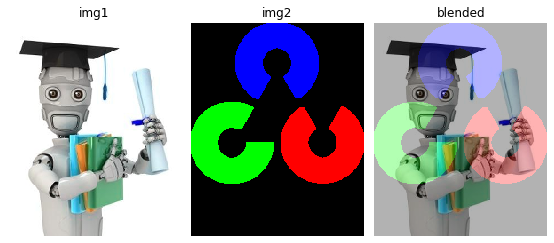

In [2]:
import matplotlib.pyplot as plt

img1 = cv2.imread('./images/ml.png')
img2 = cv2.imread('./images/opencv-logo.png')

rows, cols, channels = img2.shape
img1 = cv2.resize(img1, (cols, rows), interpolation=cv2.INTER_CUBIC)

dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

plt.subplot(131), plt.imshow(img1), plt.axis('off'), plt.title('img1')
plt.subplot(132), plt.imshow(img2), plt.axis('off'), plt.title('img2')
plt.subplot(133), plt.imshow(dst), plt.axis('off'), plt.title('blended')
plt.tight_layout(rect=(0, 0, 1.3, 1.3))
plt.show()

### Bitwise Operations

Bitwise operations에는 bitwise AND, OR, NOT, XOR 연산들이 있다.

이는 이미지의 특정 부분을 추출하거나(이후의 챕터들에서 보게 될 것이다) non-rectangular ROI를 정의하고 작업하는 경우에 아주 유용하다. 다음 예제는 어떻게 특정 영역을 이미지에 적용하는지 보여준다.

OpenCV 로고를 이미지 위에 불투명하게 넣고 싶은 경우라고 하자.

만약 두 이미지를 더한다면 색깔이 바뀔 것이고, 두 이미지를 blending 한다면 transparent effect를 얻게 될 것이다. 또한, OpenCV 로고는 rectangular하지 않다.

따라서 우리는 bitwise opeation을 다음과 같이 수행할 수 있다.

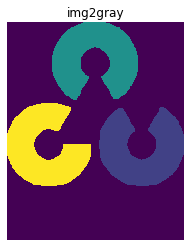

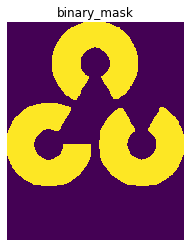

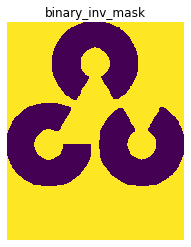

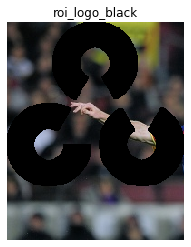

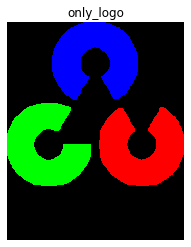

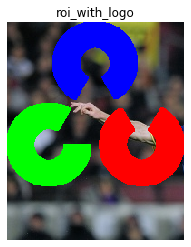

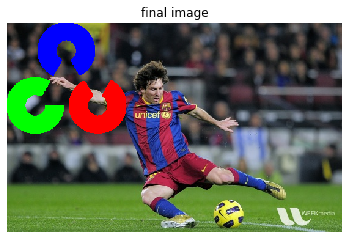

In [7]:
messi = cv2.imread('./images/messi5.jpg')
messi = cv2.cvtColor(messi, cv2.COLOR_RGB2BGR)
logo = cv2.imread('./images/opencv-logo.png')

# messi 이미지의 좌측상단에 로고를 넣기 위해 해당 영역을 ROI로 설정
rows, cols, channels = logo.shape
roi = messi[0:rows, 0:cols]

# grayscale로 변환
img2gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
plt.imshow(img2gray)
plt.title('img2gray')
plt.axis('off')
plt.show()

# 이미지 이진화 : 임계처리
# 픽셀 값이 10을 넘으면 모두 255로 변환
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(mask)
plt.title('binary_mask')
plt.axis('off')
plt.show()

# 이진화된 이미지에 bitwise_not 연산 적용
# 모든 픽셀 값의 비트를 반전(색을 반대로 표현)
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv)
plt.title('binary_inv_mask')
plt.axis('off')
plt.show()

# ROI의 logo 부분에 색이 없도록 검정색으로 변환
roi_logo_black = cv2.bitwise_and(roi, roi, mask=mask_inv)
plt.imshow(roi_logo_black)
plt.title('roi_logo_black')
plt.axis('off')
plt.show()

# logo 이미지에서 logo만 가져오기
only_logo = cv2.bitwise_and(logo, logo, mask=mask)
plt.imshow(only_logo)
plt.title('only_logo')
plt.axis('off')
plt.show()

# ROI에 logo를 덮어씌워줌
roi_with_logo = cv2.add(roi_bg, only_logo)
plt.imshow(roi_with_logo)
plt.title('roi_with_logo')
plt.axis('off')
plt.show()

# 위의 결과를 messi 이미지에 적용
messi[0:rows, 0:cols ] = roi_with_logo
plt.imshow(messi)
plt.title('final image')
plt.axis('off')
plt.show()